# **Phase 3 Project**  
# **Proactive Churn Risk Modeling for Telecom Customer Retention**

___

# **Business Problem**
The telecom company is experiencing recurring customer loss (churn), which impacts long-term revenue and customer acquisition costs. The business lacks a reliable way to predict which customers are most at risk of leaving. The goal is to develop a predictive classification model that identifies customers likely to churn based on their service usage, contract details, and account behavior. With accurate predictions, the company can implement timely retention strategies, improve customer satisfaction, and reduce churn-related losses..

# **Introduction**

In today’s saturated telecom market, customer retention is critical for maintaining profitability and long-term growth. With numerous providers offering competitive rates and packages, telecom companies must be proactive in identifying customers at risk of churning. Losing a customer not only means a loss in revenue but also incurs the cost of acquiring a new one. To address this challenge, our analysis focuses on building a machine learning model that predicts customer churn using demographic, usage, and service-related features from a real-world telecom dataset. Accurate churn prediction enables the business to deploy targeted retention strategies before customers decide to leave.
This analysis aims to answer key questions such as:  
✅ Which customer attributes are most predictive of churn?  
✅ How well can we predict churn using machine learning models?  
✅ What is the trade-off between model accuracy, precision, and recall?  
✅ Which customer segments should be prioritized for retention efforts? 

By leveraging classification models and data-driven evaluation metrics, this project delivers actionable insights that can help reduce churn and increase customer lifetime value.

# 📁**Data Sources**

We will analyze data from the following source:

📊 Telecom Customer Churn Dataset – Includes customer demographics, account information, service usage details, and churn status.   
Key features include contract type, tenure, monthly charges, payment methods, and whether the customer has tech support or internet service.  
Source: Kaggle.  
Filename: `telecom_churn.csv`

# ⚙️**Approach**

To achieve our project goals and build a robust churn prediction model, we will follow a structured machine learning pipeline:

1️⃣ **Data Preprocessing & Preparation**  
- Load necessary libraries and import the telecom churn dataset
- Inspect data types, distributions, and column meanings
- Convert categorical variables and encode the target variable (Churn)
- Split the data into training and testing sets for model evaluation

2️⃣ **Data Cleaning & Integration**  
- Handle missing values appropriately (e.g., drop or impute)
- Remove irrelevant or redundant columns (e.g., customer ID)
- Standardize numerical features via scaling where required
- Apply one-hot encoding to categorical variables for modeling

3️⃣ **Exploratory Data Analysis (EDA)**  
- Explore customer characteristics and their relationship to churn
- Visualize churn rates by contract type, tenure, and service usage
- Examine correlations and identify key features contributing to churn
- Assess class imbalance and consider resampling techniques if necessary  

4️⃣ **Model Development & Evaluation**
- Build a baseline model using Logistic Regression
- Develop a second model using a Decision Tree with tuned hyperparameters
- Evaluate models using classification metrics: accuracy, recall, precision, F1-score, and AUC-ROC
- Identify the most important predictors and validate model assumptions  

5️⃣ **Conclusion & Recommendations**
- Summarize key predictive insights (e.g., which features influence churn most)
- Recommend actionable business strategies to reduce churn risk
- Discuss limitations, ethical considerations, and deployment potential

Through this approach, we aim to deliver a predictive solution that not only forecasts churn effectively but also guides the business in making informed, data-driven customer retention decisions.

---

# 1️⃣ **Data Preprocessing & Preparation** 

## 1.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model & preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


## 1.2 Data Loading and Verifiaction

In [3]:
# Load dataset
df = pd.read_csv("telecom_churn.csv") 
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 2️⃣ **Data Cleaning & Integration** 

Inspect for missing values and data types

In [4]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Drop irrelevant columns

Convert traget to binary and TotalCharges to numeric 

In [5]:
# Basic target distribution
df['churn'].value_counts(normalize=True)

# Convert target column 'churn' to binary
df['churn'] = df['churn'].map({True: 1, False: 0})

# Drop irrelevant identifier
df.drop(columns=['phone number'], inplace=True)

# Convert area code to categorical
df['area code'] = df['area code'].astype(str) 


In [6]:
# Check for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

# 3️⃣ **Exploratory Data Analysis (EDA)** 

In this section we will explore the data further and conduct some analysis:

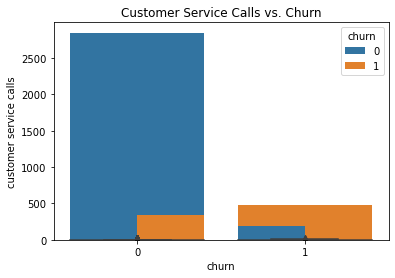

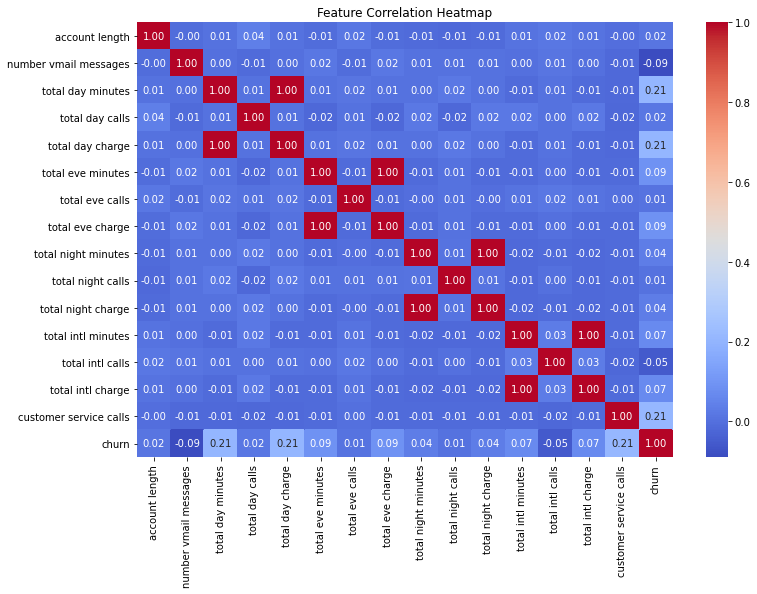

In [7]:
# Target distribution
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')

# Compare churn by international plan
sns.countplot(x='international plan', hue='churn', data=df)
plt.title('Churn by International Plan')

# Compare churn by customer service calls
sns.boxplot(x='churn', y='customer service calls', data=df)
plt.title('Customer Service Calls vs. Churn')

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


# 4️⃣ **Model Development & Evaluation**

## ✳️ **Feature Encoding and Split**

In [8]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['state', 'area code', 'international plan', 'voice mail plan'], drop_first=True)

# Split features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


## ✳️ Scaling (for Logistic Regression)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 🔹 Baseline Model: Logistic Regression

In [10]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred_log = logreg.predict(X_test_scaled)

print("🔹 Logistic Regression Report")
print(classification_report(y_test, y_pred_log))


🔹 Logistic Regression Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       570
           1       0.54      0.27      0.36        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.64       667
weighted avg       0.84      0.86      0.84       667



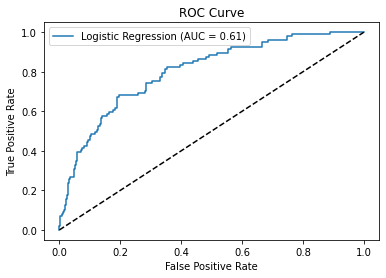

In [11]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %.2f)' % roc_auc_score(y_test, y_pred_log))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## 🔍 Logistic Regression Model Evaluation

The logistic regression model was trained on the scaled training data and evaluated on the test set. Below is a summary of the classification metrics:

## Key Results:
Overall accuracy: 86% — the model correctly predicted churn status for 86% of customers.

Class 0 (Not Churned):

Precision: 0.89 — when the model predicts a customer will stay, it's correct 89% of the time.

Recall: 0.96 — the model correctly identifies 96% of customers who did not churn.

F1-Score: 0.92 — strong balance of precision and recall.

Class 1 (Churned):

Precision: 0.54 — when the model predicts a churned customer, it's correct 54% of the time.

Recall: 0.27 — the model only captures 27% of actual churners.

F1-Score: 0.36 — low effectiveness at identifying churned customers.

## ⚠️ Interpretation:
The model performs very well at identifying non-churners, but struggles to detect actual churners.

This could be due to class imbalance (many more non-churners than churners).

Recall for churners is low, meaning many at-risk customers are not being flagged — a concern for retention strategy.

## 🌲 Tuned Model: Decision Tree

In [12]:
tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("🌲 Decision Tree Report")
print(classification_report(y_test, y_pred_tree))


🌲 Decision Tree Report
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       570
           1       0.75      0.62      0.68        97

    accuracy                           0.91       667
   macro avg       0.84      0.79      0.81       667
weighted avg       0.91      0.91      0.91       667



## 🌲 Decision Tree Classification Report Summary
Overall Accuracy: 91%

Churn Prediction (Class 1):

Precision: 0.75 — 75% of churn predictions were correct

Recall: 0.62 — captured 62% of actual churners

F1-Score: 0.68 — balanced measure of precision and recall

Not Churn (Class 0):

Strong performance with 96% recall and 0.95 F1-score

## ✅ Interpretation
This model performs significantly better than logistic regression at identifying churners.

It balances performance across both classes, making it more useful for retention strategies.

Good recall (62%) means it catches more actual churners — key for preventing loss.

## 📊 Feature Importance (Decision Tree)

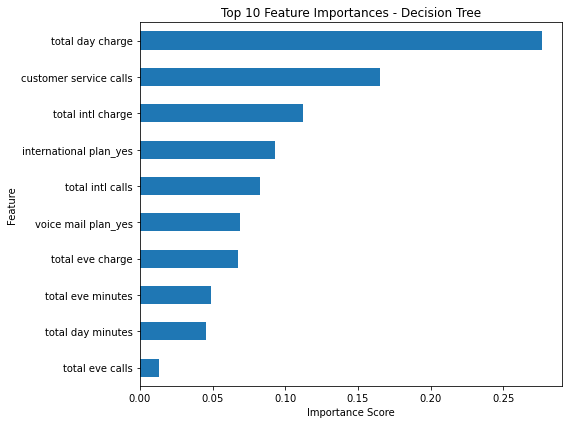

In [13]:
# Compute and plot feature importances
importances = pd.Series(tree.feature_importances_, index=X.columns)
top_features = importances.nlargest(10)

plt.figure(figsize=(8, 6))
top_features.plot(kind='barh')
plt.title("Top 10 Feature Importances - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # optional: put most important on top
plt.tight_layout()
plt.show()

## 5️⃣ Conclusion & Recommendations

### ✅ Conclusion

- This project successfully developed predictive models to classify customer churn using telecom service data. The logistic regression model achieved high overall accuracy (86%) but struggled to identify actual churners (recall: 27%). In contrast, the decision tree model improved churn detection (recall: 62%) while maintaining strong overall accuracy (91%).

Key predictors of churn included:

- Customer service calls

- International plan

- Total day minutes

### 📌 Recommendations

The decision tree model is more effective for churn prediction and should be used for customer retention efforts. We recommend:

- Targeting customers with frequent service issues, high usage, or international plans, as these are strong churn indicators.

- Implementing proactive support or incentives for at-risk customers identified by the model.

- Exploring ensemble methods (e.g., Random Forest) to further enhance recall while preserving accuracy.



### ⚠️ Limitations

- Class imbalance could affect model recall for churned customers.
- More advanced ensemble models (e.g., Random Forest or XGBoost) could further improve prediction but may reduce interpretability.

